<a href="https://colab.research.google.com/github/harishsd1998/Class-Imbalance-Feature-Selection/blob/main/Class_Imbalance_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part-A: Class Imbalance, ensembles, and feature selection.

**1. Rebalancing original dataset into Oversampling, Undersampling and Balanced sampling datasets.**

In [ ]:
#Importing required libraries and converting the dataset into dataframe using "pandas" library.
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('bank-additional-full.csv',sep = ';')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

**Label Encoding of 'month' and 'day_of_week' features**

In [ ]:
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
df['month'] = label_encoder1.fit_transform(df['month'].astype(str)) 
df['day_of_week'] = label_encoder2.fit_transform(df['day_of_week'].astype(str))

**Implementing our own user defined function namely "encode_and_bind" which will perform "One-hot-encoding" and binds those columns to our original dataframe.**

In [ ]:
def encode_and_bind(df,feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([feature_to_encode],axis=1)
    return(df)

**Selecting the categorical columns which are not ordinal for "One-hot-encoding".**

In [ ]:
features_to_encode = ['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'] 
for feature in features_to_encode:
    df = encode_and_bind(df,feature)

In [ ]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,...,0,1,1,0,0,0,1,0,1,0
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,0,334,1,999,0,-1.1,94.767,-50.8,...,0,1,1,0,0,1,0,0,1,0
41184,46,7,0,383,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,189,2,999,0,-1.1,94.767,-50.8,...,0,1,1,0,0,1,0,0,1,0
41186,44,7,0,442,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,1,0,0,1,0


**Since our class label is 'y', we are label-encoding it with the help of "map" function.**

In [ ]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000
month,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
day_of_week,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
duration,261.000,149.000,226.000,151.000,307.000,198.000,139.000,217.000,380.000,50.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400


**Creating Independent and Dependent Features**

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["y"]]
# Storing the variable we are predicting 
target = "y"
# Defining a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(41188, 50)
(41188,)


Text(0, 0.5, 'Frequency')

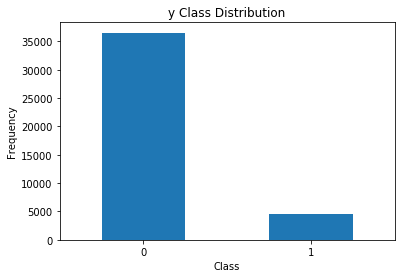

In [ ]:
# Calculating and Representing the count of categorical variables yes(1) & no(0) of the 'y' class with the help of "bar chart"
import matplotlib.pyplot as plt
%matplotlib inline
count_classes = pd.value_counts(df['y'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("y Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
#Getting the count of "y" target columns categories "yes" and "no" which represents Product Purchased and Product Not Purchased Respectively.
yes = df[df['y']==1]
no = df[df['y']==0]

In [ ]:
print(yes.shape,no.shape)

(4640, 51) (36548, 51)


**1(a) Over Sampling of minority class**

In [ ]:
#Using SMOTE method to create Oversampled Dataset from the Imbalanced Dataset
from imblearn.over_sampling import SMOTE
OverSampler =  SMOTE()
X_oversample, y_oversample = OverSampler.fit_sample(X, Y)
X_oversample.shape,y_oversample.shape

((73096, 50), (73096,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_oversample)))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled dataset shape Counter({0: 36548, 1: 36548})


**1(b) Under Sampling of majority class**

In [ ]:
import sklearn
#Importing "imbalanced-learn" library
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced  Dataset 
nm = NearMiss(random_state=42)
#Generating new independent and dependent feature based on the count and the under sampling of the "y" output feature
X_undersample,y_undersample=nm.fit_sample(X,Y)

In [ ]:
X_undersample.shape,y_undersample.shape

((9280, 50), (9280,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled undersampled dataset shape {}'.format(Counter(y_undersample)))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled undersampled dataset shape Counter({0: 4640, 1: 4640})


**1(c) Balanced Sampling**

In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_balanced_sample,y_balanced_sample=smk.fit_sample(X,Y)

In [ ]:
X_balanced_sample.shape,y_balanced_sample.shape

((72590, 50), (72590,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_oversample)))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled dataset shape Counter({0: 36548, 1: 36548})


**2. Implementation of four algorithms namely K-Nearest Neighbors(KNN),Support Vector Machine(SVM),Decision Tree and Naive Bayesian Learner Algorithms against three resampled datasets using tenfold cross validation.**

**Implementing K-Nearest-Neighbors algorithm for Oversampled dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X_oversample, y_oversample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_oversampled_scores = print('knn_oversampled_cross_val_scores:{}'.format(cross_val_scores))
knn_oversampled_best_score = print('knn_oversampled_cross_val_scores mean:{}'.format(np.mean(cross_val_scores)))

knn_oversampled_cross_val_scores:[0.95854993 0.95731874 0.95512996 0.94870041 0.94240766 0.9374829
 0.84430155 0.75058147 0.84922698 0.60268163]
knn_oversampled_cross_val_scores mean:0.87463812300447


**Implementing K-Nearest-Neighbors algorithm for Undersampled dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X_undersample, y_undersample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_undersampled_scores = print('knn_undersampled_cross_val_scores:{}'.format(cross_val_scores))
knn_undersampled_best_score = print('knn_undersampled_cross_val_scores mean:{}'.format(np.mean(cross_val_scores)))

knn_undersampled_cross_val_scores:[0.5387931  0.63469828 0.63038793 0.57327586 0.6325431  0.68211207
 0.80603448 0.84267241 0.90193966 0.86206897]
knn_undersampled_cross_val_scores mean:0.7104525862068966


**Implementing K-Nearest-Neighbors algorithm for Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X_balanced_sample, y_balanced_sample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_balance_sampled_scores = print('knn_balance_sampled_cross_val_scores:{}'.format(cross_val_scores))
knn_balance_sampled_best_score = print('knn_balance_sampled_cross_val_scores mean:{}'.format(np.mean(cross_val_scores)))

knn_balance_sampled_cross_val_scores:[0.95939436 0.95898142 0.9559532  0.95003441 0.94480385 0.93503097
 0.85767378 0.75320028 0.84735031 0.61197522]
knn_balance_sampled_cross_val_scores mean:0.8774397797660013


**Implementing Decision Tree algorithm for Oversampled dataset using tenfold cross validation.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating a new decision tree model
DecisionTree_classifier = DecisionTreeClassifier()
#training our model with cross value of 10
decisiontree_oversampled_data_scores = cross_val_score(DecisionTree_classifier, X_oversample, y_oversample, cv=10)
#printing the values of 10 scores
decision_tree_oversampled_scores = print('decision_tree_oversampled_cross_val_scores:{}'.format(decisiontree_oversampled_data_scores))
decision_tree_oversampled_best_score = print('decision_tree_oversampled_cross_val_scores mean:{}'.format(np.mean(decisiontree_oversampled_data_scores)))

decision_tree_oversampled_cross_val_scores:[0.63187415 0.92270862 0.94911081 0.96922025 0.9621067  0.9246238
 0.74428786 0.55602682 0.87905322 0.57887536]
decision_tree_oversampled_cross_val_scores mean:0.8117887584577529


**Implementing Decision Tree algorithm for Undersampled dataset using tenfold cross validation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating a new decision tree model
DecisionTree_classifier = DecisionTreeClassifier()
#training our model with cross value of 10
decisiontree_undersampled_data_scores = cross_val_score(DecisionTree_classifier, X_undersample, y_undersample, cv=10)
#printing the values of 10 scores
decision_tree_undersampled_scores = print('decision_tree_oversampled_cross_val_scores:{}'.format(decisiontree_undersampled_data_scores))
decision_tree_undersampled_best_score = print('decision_tree_oversampled_cross_val_scores mean:{}'.format(np.mean(decisiontree_undersampled_data_scores)))

decision_tree_oversampled_cross_val_scores:[0.38038793 0.56034483 0.55711207 0.52909483 0.56465517 0.58836207
 0.41594828 0.39439655 0.65948276 0.69612069]
decision_tree_oversampled_cross_val_scores mean:0.5345905172413794


**Implementing Decision Tree algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating a new decision tree model
DecisionTree_classifier = DecisionTreeClassifier()
#training our model with cross value of 10
decisiontree_balance_sampled_data_scores = cross_val_score(DecisionTree_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing the values of 10 scores
decision_tree_balance_sampled_scores = print('decision_tree_balance_sampled_cross_val_scores:{}'.format(decisiontree_balance_sampled_data_scores))
decision_tree_balance_sampled_best_score = print('decision_tree_balance_sampled_cross_val_scores mean:{}'.format(np.mean(decisiontree_balance_sampled_data_scores)))

decision_tree_balance_sampled_cross_val_scores:[0.63041982 0.9193393  0.94480385 0.97068135 0.96200964 0.95388851
 0.74769443 0.56145905 0.88176187 0.58926359]
decision_tree_balance_sampled_cross_val_scores mean:0.816132140399174


**Implementing Naive Bayes algorithm for Oversampled dataset using tenfold cross validation**

In [ ]:
#creating a new naive bayes model
from sklearn.naive_bayes import GaussianNB
NaiveBayes_classifier = GaussianNB(np.random.seed(999))
#training our model with cross value of 10
naivebayes_oversampled_data_scores = cross_val_score(NaiveBayes_classifier, X_oversample, y_oversample, cv=10)
#printing the values of 10 scores
naivebayes_oversampled_scores = print('naivebayes_oversampled_cross_val_scores:{}'.format(naivebayes_oversampled_data_scores))
naivebayes_oversampled_best_score = print('naivebayes_oversampled_cross_val_scores mean:{}'.format(np.mean(naivebayes_oversampled_data_scores)))

naivebayes_oversampled_cross_val_scores:[0.77715458 0.88002736 0.85170999 0.85581395 0.84459644 0.84760602
 0.80284581 0.63798057 0.60952251 0.44137365]
naivebayes_oversampled_cross_val_scores mean:0.7548630878595604


**Implementing Naive Bayes algorithm for Undersampled dataset using tenfold cross validation**

In [ ]:
#creating a new naive bayes model
from sklearn.naive_bayes import GaussianNB
NaiveBayes_classifier = GaussianNB(np.random.seed(999))
#training our model with cross value of 10
naivebayes_undersampled_data_scores = cross_val_score(NaiveBayes_classifier, X_undersample, y_undersample, cv=10)
#printing the values of 10 scores
naivebayes_undersampled_scores = print('naivebayes_undersampled_cross_val_scores:{}'.format(naivebayes_oversampled_data_scores))
naivebayes_undersampled_best_score = print('naivebayes_undersampled_cross_val_scores mean:{}'.format(np.mean(naivebayes_undersampled_data_scores)))

naivebayes_undersampled_cross_val_scores:[0.77715458 0.88002736 0.85170999 0.85581395 0.84459644 0.84760602
 0.80284581 0.63798057 0.60952251 0.44137365]
naivebayes_undersampled_cross_val_scores mean:0.6678879310344827


**Implementing Naive Bayes algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
#creating a new naive bayes model
from sklearn.naive_bayes import GaussianNB
NaiveBayes_classifier = GaussianNB(np.random.seed(999))
#training our model with cross value of 10
naivebayes_balancesampled_data_scores = cross_val_score(NaiveBayes_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing the values of 10 scores
naivebayes_balance_sampled_scores = print('naivebayes_balancesampled_cross_val_scores:{}'.format(naivebayes_balancesampled_data_scores))
naivebayes_balance_sampled_best_score = print('naivebayes_balancesampled_cross_val_scores mean:{}'.format(np.mean(naivebayes_balancesampled_data_scores)))

naivebayes_balancesampled_cross_val_scores:[0.77742602 0.88327598 0.85891259 0.85560908 0.84528562 0.84597385
 0.81362698 0.64294563 0.60825877 0.45423262]
naivebayes_balancesampled_cross_val_scores mean:0.7585547143840332


**Implementing Support Vector Machine algorithm for Oversampled dataset using tenfold cross validation**

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cross value of 10
svm_oversampled_data_scores = cross_val_score(support_vector_classifier, X_oversample, y_oversample, cv=10)
#printing the values of 10 scores
svm_oversampled_scores = print('svm_oversampled_cross_val_scores:{}'.format(svm_oversampled_data_scores))
svm_oversampled_best_score = print('svm_oversampled_cross_val_scores mean:{}'.format(np.mean(svm_oversampled_data_scores)))

svm_oversampled_cross_val_scores:[0.85458276 0.89329685 0.89439124 0.89439124 0.89015048 0.9002736
 0.89027227 0.7857436  0.76617868 0.60049254]
svm_oversampled_cross_val_scores mean:0.8369773281408769


**Implementing Support Vector Machine algorithm for Undersampled dataset using tenfold cross validation**

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cross value of 10
svm_undersampled_data_scores = cross_val_score(support_vector_classifier, X_undersample, y_undersample, cv=10)
#printing the values of 10 scores
svm_undersampled_scores = print('svm_undersampled_cross_val_scores:{}'.format(svm_undersampled_data_scores))
svm_undersampled_best_score = print('svm_undersampled_cross_val_scores mean:{}'.format(np.mean(svm_undersampled_data_scores)))

svm_undersampled_cross_val_scores:[0.75538793 0.72306034 0.65732759 0.61099138 0.82327586 0.6325431
 0.68857759 0.73491379 0.79956897 0.83728448]
svm_undersampled_cross_val_scores mean:0.7262931034482759


**Implementing Support Vector Machine algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cross value of 10
svm_balancesampled_data_scores = cross_val_score(support_vector_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing the values of 10 scores
svm_balance_sampled_scores = print('svm_balancesampled_cross_val_scores:{}'.format(svm_balancesampled_data_scores))
svm_balance_sampled_best_score = print('svm_balancesampled_cross_val_scores mean:{}'.format(np.mean(svm_balancesampled_data_scores)))

svm_balancesampled_cross_val_scores:[0.85507845 0.89306358 0.8971924  0.89388935 0.88879714 0.90352326
 0.8896229  0.78598954 0.76902959 0.61142464]
svm_balancesampled_cross_val_scores mean:0.8387610852495545


**3. Building Random Forest and Extreme Learning Trees Algorithm models using tenfold cross validation against Oversampled,Undersampled and Balanced sample dataset.**

**Implementing Random Forest algorithm for Oversampled dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new svm model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cross value of 10
randomforest_oversampled_data_scores = cross_val_score(random_forest_classifier, X_oversample, y_oversample, cv=10)
#printing the values of 10 scores
randomforest_oversampled_scores = print('randomforest_oversampled_cross_val_scores:{}'.format(randomforest_oversampled_data_scores))
randomforest_oversampled_best_score = print('randomforest_oversampled_cross_val_scores mean:{}'.format(np.mean(randomforest_oversampled_data_scores)))

randomforest_oversampled_cross_val_scores:[0.57086183 0.91846785 0.95923393 0.98180575 0.97893297 0.96826265
 0.91339445 0.65905049 0.92666575 0.60952251]
randomforest_oversampled_cross_val_scores mean:0.8486198171435287


**Implementing Random Forest algorithm for Undersampled dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new svm model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cross value of 10
randomforest_undersampled_data_scores = cross_val_score(random_forest_classifier, X_undersample, y_undersample, cv=10)
#printing the values of 10 scores
randomforest_undersampled_scores = print('randomforest_undersampled_cross_val_scores:{}'.format(randomforest_undersampled_data_scores))
randomforest_undersampled_best_score = print('randomforest_undersampled_cross_val_scores mean:{}'.format(np.mean(randomforest_undersampled_data_scores)))

randomforest_undersampled_cross_val_scores:[0.4137931  0.47090517 0.50969828 0.51077586 0.5075431  0.55711207
 0.51831897 0.62715517 0.79741379 0.73599138]
randomforest_undersampled_cross_val_scores mean:0.5648706896551724


**Implementing Random Forest algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new svm model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cross value of 10
randomforest_balancesampled_data_scores = cross_val_score(random_forest_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing the values of 10 scores
randomforest_balance_sampled_scores = print('randomforest_balancesampled_cross_val_scores:{}'.format(randomforest_balancesampled_data_scores))
randomforest_balance_sampled_best_score = print('randomforest_balancesampled_cross_val_scores mean:{}'.format(np.mean(randomforest_balancesampled_data_scores)))

randomforest_balancesampled_cross_val_scores:[0.56260319 0.92652724 0.96257567 0.98321409 0.97729774 0.96601541
 0.94399339 0.66024494 0.92500344 0.60988028]
randomforest_balancesampled_cross_val_scores mean:0.8517355410299755


**Implementing Extreme learning trees algorithm for Oversampled dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
#training our model with cross value of 10
extreme_learning_tree_oversampled_data_scores = cross_val_score(ExtraTrees_classifier, X_oversample, y_oversample, cv=10)
#printing the values of 10 scores
extreme_learning_tree_oversampled_scores = print('extreme_tree_oversampled_cross_val_scores:{}'.format(extreme_learning_tree_oversampled_data_scores))
extreme_learning_tree_oversampled_best_score = print('extreme_tree_oversampled_cross_val_scores mean:{}'.format(np.mean(extreme_learning_tree_oversampled_data_scores)))

extreme_tree_oversampled_cross_val_scores:[0.6376197  0.96662107 0.91067031 0.98577291 0.98071135 0.96607387
 0.85565741 0.68805582 0.94445205 0.61362704]
extreme_tree_oversampled_cross_val_scores mean:0.8549261531095876


**Implementing Extreme learning trees algorithm for Undersampled dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
#training our model with cross value of 10
extreme_learning_tree_undersampled_data_scores = cross_val_score(ExtraTrees_classifier, X_undersample, y_undersample, cv=10)
#printing the values of 10 scores
extreme_learning_tree_undersampled_scores = print('extreme_tree_undersampled_cross_val_scores:{}'.format(extreme_learning_tree_undersampled_data_scores))
extreme_learning_tree_undersampled_best_score = print('extreme_tree_undersampled_cross_val_scores mean:{}'.format(np.mean(extreme_learning_tree_undersampled_data_scores)))

extreme_tree_undersampled_cross_val_scores:[0.40517241 0.47844828 0.49892241 0.47952586 0.48168103 0.53017241
 0.65193966 0.75538793 0.85668103 0.79202586]
extreme_tree_undersampled_cross_val_scores mean:0.5929956896551725


**Implementing Extreme learning trees algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
#training our model with cross value of 10
extreme_learning_tree_balancesampled_data_scores = cross_val_score(ExtraTrees_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing the values of 10 scores
extreme_learning_tree_balance_sampled_scores = print('extreme_tree_balance_sampled_cross_val_scores:{}'.format(extreme_learning_tree_balancesampled_data_scores))
extreme_learning_tree_balance_sampled_best_score = print('extreme_tree_balance_sampled_cross_val_scores mean:{}'.format(np.mean(extreme_learning_tree_balancesampled_data_scores)))

extreme_tree_balance_sampled_cross_val_scores:[0.6432306  0.96917997 0.90506329 0.98665382 0.97977435 0.96780407
 0.8684464  0.68928031 0.95238751 0.62033852]
extreme_tree_balance_sampled_cross_val_scores mean:0.8582158840496907


**4.** Balanced Sampling method produced the best accuracy scores for all the algorithms applied on balanced  dataset when compared to that of over and under sampled dataset. The main reason behind this is that it uses over sampling which involves random duplicating examples in the minority class. In addition, it also uses under sampling which will remove examples from the majority class. Also, while handling class imbalanced dataset , balanced sampling method uses  “SMOTETomek” method which is a hybrid method that uses an under sampling method(Tomek)  with an over sampling method(SMOTE) to make the dependent class feature i.e., the target varibale categories into equal shape. Although, the average accuracy scores  for both balanced and over sampled datasets are almost similar,I prefer balanced sampling  instead of over sampling. This is because the disadvantage with oversampling method is that it will duplicate and create new synthetic examples in the minority class which will result in overfitting of data. Also, it increases the number of training examples resulting in the increase of learning time. 

**5. Creating a table which shows the accuracies of six algorithms against each one of the tenfolds when trained using Balanced Sampling technique.**

**Implementing KNN algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import statistics
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 3)
#training our model with cv of 10 
knn_cross_val_scores = cross_val_score(knn_cv, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(knn_cross_val_scores)
#printing the average of them
knn_avg_score = np.mean(knn_cross_val_scores)
print(knn_avg_score)
#printing standard deviation using statistics module
knn_stdev = statistics.stdev(knn_cross_val_scores)
print(knn_stdev)

[0.96597796 0.96556474 0.9600551  0.95633609 0.9523416  0.93553719
 0.8677686  0.75523416 0.86499518 0.6130321 ]
0.8836842703481608
0.11659265574337005


**Implementing Decision Tree algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating a new decision tree model
DecisionTree_classifier = DecisionTreeClassifier(random_state=999)
#training our model with cross value of 10
decisiontree_cross_val_scores = cross_val_score(DecisionTree_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(decisiontree_cross_val_scores)
#printing the average of them
decisiontree_avg_score = np.mean(decisiontree_cross_val_scores)
print(decisiontree_avg_score)

[0.63344804 0.91961459 0.95127323 0.970819   0.96187199 0.95306263
 0.74907089 0.56214728 0.88217481 0.58912595]
0.8172608396421198


In [ ]:
#printing standard deviation using statistics module
decisiontree_stdev = statistics.stdev(decisiontree_cross_val_scores)
print(decisiontree_stdev)

0.16704940196684387


**Implementing Naive Bayes algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
#creating a new naive bayes model
from sklearn.naive_bayes import GaussianNB
NaiveBayes_classifier = GaussianNB(np.random.seed(999))
#training our model with cv of 10 
naivebayes_cross_val_scores = cross_val_score(NaiveBayes_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(naivebayes_cross_val_scores)
#printing the average of them
naivebayes_avg_score = np.mean(naivebayes_cross_val_scores)
print(naivebayes_avg_score)
#printing standard deviation using statistics module
naivebayes_stdev = statistics.stdev(naivebayes_cross_val_scores)
print(naivebayes_stdev)

[0.77742602 0.88327598 0.85891259 0.85560908 0.84528562 0.84597385
 0.81362698 0.64294563 0.60825877 0.45423262]
0.7585547143840332
0.1422698333113747


**Implementing Support Vector Machine algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cv of 10 
svm_cross_val_scores = cross_val_score(support_vector_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(svm_cross_val_scores)
#printing the average of them
svm_avg_score = np.mean(svm_cross_val_scores)
print(svm_avg_score)

[0.85633609 0.89366391 0.89641873 0.89146006 0.89256198 0.90275482
 0.88732782 0.79201102 0.76195068 0.6088993 ]
0.8383384414597705


In [ ]:
#printing standard deviation using statistics module
import statistics
svm_stdev = statistics.stdev(svm_cross_val_scores)
print(svm_stdev)

0.09263181914493475


**Implementing Random Forest algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cv of 10 
randomforest_cross_val_scores = cross_val_score(random_forest_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(randomforest_cross_val_scores)
#printing the average of them
randomforest_avg_score = np.mean(randomforest_cross_val_scores)
print(randomforest_avg_score)

[0.5630854  0.92837466 0.94407713 0.98347107 0.97961433 0.96735537
 0.92603306 0.66639118 0.92436975 0.6164761 ]
0.8499248050392085


In [ ]:
#printing standard deviation using statistics module
randomforest_stdev = statistics.stdev(randomforest_cross_val_scores)
print(randomforest_stdev )

0.16938879380252098


**Implementing Extreme learning trees algorithm for Balanced dataset using tenfold cross validation**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a new model
ExtraTrees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
extreme_trees_cross_val_scores = cross_val_score(ExtraTrees_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(extreme_trees_cross_val_scores)
#printing the average of them
extreme_trees_avg_score = np.mean(extreme_trees_cross_val_scores)
print(extreme_trees_avg_score )

[0.63964212 0.96641432 0.90777701 0.98623538 0.98251893 0.9687543
 0.86083964 0.68947006 0.94631796 0.62105988]
0.8569029593943565


In [ ]:
#printing standard deviation using statistics module
extremeforest_stdev = statistics.stdev(extreme_trees_cross_val_scores)
print(extremeforest_stdev )

0.14849856783687987


**Displaying the table showing the accuracies and standard deviation of the six algorithms against Balanced sample dataset**

In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'KNN': knn_cross_val_scores,
    'Decision Tree': decisiontree_cross_val_scores,
    'Naive Bayes' : naivebayes_cross_val_scores,
    'Random Forest':randomforest_cross_val_scores,
    'Extreme Trees':extreme_trees_cross_val_scores, 
    #Taking the cross val scores of SVM got from the above execution
    'SVM':svm_avg_score
}

df1 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'KNN':knn_avg_score,'Decision Tree' :decisiontree_avg_score,
            'Naive Bayes':naivebayes_avg_score, 'Random Forest':randomforest_avg_score,
           'Extreme Trees':extreme_trees_avg_score,'SVM':svm_avg_score }
stdev_row = {'KNN':knn_stdev,'Decision Tree':decisiontree_stdev,'Naive Bayes':naivebayes_stdev,
             'Random Forest':randomforest_stdev,'Extreme Trees':extremeforest_stdev,'SVM':svm_stdev}
df1 = df1.append(mean_row,ignore_index = True) 
df1 = df1.append(stdev_row,ignore_index=True)
df1.index += 1
df1.rename(index={11: 'mean',12:'stdev'})

Folds,KNN,Decision Tree,Naive Bayes,Random Forest,Extreme Trees,SVM
1,0.966139,0.633448,0.777426,0.564487,0.639642,0.837412
2,0.963937,0.919615,0.883276,0.923056,0.966414,0.837412
3,0.959257,0.951273,0.858913,0.964763,0.907777,0.837412
4,0.956091,0.970819,0.855609,0.984171,0.986235,0.837412
5,0.951686,0.961872,0.845286,0.977701,0.982519,0.837412
6,0.939711,0.953063,0.845974,0.965038,0.968754,0.837412
7,0.865657,0.749071,0.813627,0.944804,0.860840,0.837412
8,0.754301,0.562147,0.642946,0.665795,0.689470,0.837412
9,0.867309,0.882175,0.608259,0.929938,0.946318,0.837412
10,0.611149,0.589126,0.454233,0.602202,0.621060,0.837412


**6. Checking whether there is statistically significant difference in the accuracies obtained by KNN, Decision Tree, Naive Bayes, Support Vector Machine ,Random Forest and Extreme Trees against Balanced sample dataset**

**Checking whether there is statistically significant difference in the accuracies between KNN & algorithms(Decision Tree, Naive Bayes, Support Vector Machine ,Random Forest and Extreme Trees) against Balanced sample dataset**

In [ ]:
#Obtaining the 10 fold cross validation scores of KNN & Decision Tree algorithms combination.
KNN_DecisionTree_cross_val_scores = (knn_cross_val_scores - decisiontree_cross_val_scores)
#Obtaining the 10 fold cross validation scores of KNN & Naive Bayes algorithms combination.
KNN_NaiveBayes_cross_val_scores = (knn_cross_val_scores-naivebayes_cross_val_scores)
#Obtaining the 10 fold cross validation scores of KNN & Support Vector Machine algorithms combination.
KNN_SVM_cross_val_scores = (knn_cross_val_scores-svm_cross_val_scores)
#Obtaining the 10 fold cross validation scores of KNN & Random Forest algorithms combination.
KNN_RandomForest_cross_val_scores = (knn_cross_val_scores-randomforest_cross_val_scores)
#Obtaining the 10 fold cross validation scores of KNN & Extreme Trees algorithms combination.
KNN_ExtremeTrees_cross_val_scores = (knn_cross_val_scores-extreme_trees_cross_val_scores)

In [ ]:
#Obtaining the mean of cross validation scores of KNN & Decision Tree algorithms combination.
KNN_DecisionTree_mean = np.mean(KNN_DecisionTree_cross_val_scores)
#Obtaining the mean of cross validation scores of KNN & Naive Bayes algorithms combination.
KNN_NaiveBayes_mean = np.mean(KNN_NaiveBayes_cross_val_scores )
#Obtaining the mean of cross validation scores of KNN & Support Vector Machine algorithms combination.
KNN_SVM_mean = np.mean(KNN_SVM_cross_val_scores)
#Obtaining the mean of cross validation scores of KNN & Random Forest algorithms combination.
KNN_RandomForest_mean = np.mean(KNN_RandomForest_cross_val_scores )
#Obtaining the mean of cross validation scores of KNN & Extreme Trees algorithms combination.
KNN_ExtremeTrees_mean = np.mean(KNN_ExtremeTrees_cross_val_scores)

In [ ]:
#Obtaining Standard Deviation using statistics module
import statistics
#Obtaining the Standard Deviation of KNN & Decision Tree algorithms combination.
KNN_Decision_Tree_stdev = statistics.stdev(KNN_DecisionTree_cross_val_scores)
#Obtaining the Standard Deviation of KNN & Naive Bayes algorithms combination.
KNN_NaiveBayes_stdev = statistics.stdev(KNN_NaiveBayes_cross_val_scores )
#Obtaining the Standard Deviation of KNN & Support Vector Machine algorithms combination.
KNN_SVM_stdev = statistics.stdev(KNN_SVM_cross_val_scores)
#Obtaining the Standard Deviation of KNN & Random Forest algorithms combination.
KNN_RandomForest_stdev = statistics.stdev(KNN_RandomForest_cross_val_scores )
#Obtaining the Standard Deviation of KNN & Extreme Trees algorithms combination.
KNN_ExtremeTrees_stdev = statistics.stdev(KNN_ExtremeTrees_cross_val_scores)

**Applying Paired-T test to obtain the p_value to check whether there is a statistically significant difference between the algorithms.**

In [ ]:
import scipy.stats as stats
import math

#Obtaining p_value for KNN & Decision Tree algorithms combination.
_,knn_decisiontree_p_value=stats.ttest_rel(a=knn_cross_val_scores,b=decisiontree_cross_val_scores)
#Obtaining p_value for KNN & Naive Bayes algorithms combination.
_,knn_naivebayes_p_value=stats.ttest_rel(a=knn_cross_val_scores,b=naivebayes_cross_val_scores)

#Obtaining p_value for KNN & Support Vector Machine algorithms combination.
_,knn_svm_p_value=stats.ttest_rel(a=knn_cross_val_scores,b=svm_cross_val_scores)

#Obtaining p_value for KNN & Random Forest algorithms combination.
_,knn_randomforest_p_value=stats.ttest_rel(a=knn_cross_val_scores,b=randomforest_cross_val_scores)

#Obtaining p_value for KNN & Extreme Trees algorithms combination.
_,knn_extremetrees_p_value=stats.ttest_rel(a=knn_cross_val_scores,b=extreme_trees_cross_val_scores)


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'Knn-DecisionTree': KNN_DecisionTree_cross_val_scores,
    'Knn-NaiveBayes': KNN_NaiveBayes_cross_val_scores,
    'Knn-SVM' : KNN_SVM_cross_val_scores,
    'Knn-RandomForest':KNN_RandomForest_cross_val_scores ,
    'Knn-ExtremeTrees':KNN_ExtremeTrees_cross_val_scores
}

df2 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'Knn-DecisionTree':KNN_DecisionTree_mean,'Knn-NaiveBayes' :KNN_NaiveBayes_mean,
            'Knn-SVM':KNN_SVM_mean, 'Knn-RandomForest':KNN_RandomForest_mean,
           'Knn-ExtremeTrees':KNN_ExtremeTrees_mean }

stdev_row ={'Knn-DecisionTree':KNN_Decision_Tree_stdev,'Knn-NaiveBayes' :KNN_NaiveBayes_stdev,
            'Knn-SVM':KNN_SVM_stdev, 'Knn-RandomForest':KNN_RandomForest_stdev,
           'Knn-ExtremeTrees':KNN_ExtremeTrees_stdev }

p_value_row = {'Knn-DecisionTree':knn_decisiontree_p_value , 'Knn-NaiveBayes':knn_naivebayes_p_value,
               'Knn-SVM':knn_svm_p_value, 'Knn-RandomForest':knn_randomforest_p_value ,
               'Knn-ExtremeTrees':knn_extremetrees_p_value}
df2 = df2.append(mean_row,ignore_index = True) 
df2 = df2.append(stdev_row,ignore_index=True)
df2 = df2.append(p_value_row,ignore_index=True)
df2.index += 1
df2.rename(index={11: 'mean',12:'stdev',13:'p_value'})

Folds,Knn-DecisionTree,Knn-NaiveBayes,Knn-SVM,Knn-RandomForest,Knn-ExtremeTrees
1,0.332691,0.188713,0.110255,0.401652,0.326497
2,0.044322,0.080661,0.071714,0.040881,-0.002478
3,0.007983,0.100344,0.062491,-0.005506,0.051480
4,-0.014728,0.100482,0.065933,-0.028080,-0.030145
5,-0.010186,0.106401,0.065795,-0.026015,-0.030833
6,-0.013352,0.093737,0.041019,-0.025327,-0.029043
7,0.116586,0.052030,-0.026015,-0.079147,0.004818
8,0.192154,0.111356,-0.029732,0.088507,0.064831
9,-0.014866,0.259050,0.100895,-0.062629,-0.079009
10,0.022023,0.156917,-0.001239,0.008947,-0.009911


In [ ]:
#Checking whether Knn & Decision Tree algorithms have statistically significant difference
if(knn_decisiontree_p_value<0.05):
    print("Knn and Decision Tree have significant difference with p_value of : ",end="")
    print(round(knn_decisiontree_p_value,4))
else:
    print("Knn and Decision Tree does have significant difference with p_value of : ",end="")
    print(round(knn_decisiontree_p_value,4))
    
#Checking whether Knn & Naive Bayes algorithms have statistically significant difference
if(knn_naivebayes_p_value<0.05):
    print("Knn and Naive Bayes have significant difference with p_value of : ",end="")
    print(round(knn_naivebayes_p_value,10))
else:
    print("Knn and Naive Bayes does not have significant difference with p_value of : ",end="")
    print(round(knn_naivebayes_p_value,10))
        
#Checking whether Knn & Support Vector Machine algorithms have statistically significant difference
if(knn_svm_p_value<0.05):
    print("Knn and Support Vector Machine have significant difference with p_value of : ",end="")
    print(round(knn_svm_p_value,4))
else:
    print("Knn and Support Vector Machine does not have significant difference with p_value of : ",end="")
    print(round(knn_svm_p_value,4))
    
#Checking whether Knn & Random Forest algorithms have statistically significant difference
if(knn_randomforest_p_value<0.05):
    print("Knn and Random Forest have significant difference with p_value of : ",end="")
    print(round(knn_randomforest_p_value,4))
else:
    print("Knn and Random Forest does not have significant difference with p_value of : ",end="")
    print(round(knn_randomforest_p_value,4))
    
#Checking whether Knn & Extreme Trees algorithms have statistically significant difference
if(knn_extremetrees_p_value<0.05):
    print("Knn and Extreme Trees have significant difference with p_value of : ",end="")
    print(round(knn_extremetrees_p_value,4))
else:
    print("Knn and Extreme Trees does not have significant difference with p_value of : ",end="")
    print(round(knn_extremetrees_p_value,4))

Knn and Decision Tree does have significant difference with p_value of : 0.1036
Knn and Naive Bayes have significant difference with p_value of : 0.0001088016
Knn and Support Vector Machine have significant difference with p_value of : 0.0163
Knn and Random Forest does not have significant difference with p_value of : 0.4935
Knn and Extreme Trees does not have significant difference with p_value of : 0.4763


**Checking whether there is statistically significant difference in the accuracies between Decision Tree & algorithms(Naive Bayes, Support Vector Machine ,Random Forest and Extreme Trees) against Balanced sample dataset**

In [ ]:
#Obtaining the 10 fold cross validation scores of Decision Tree & Naive Bayes algorithms combination.
DecisionTree_NaiveBayes_cross_val_scores = (decisiontree_cross_val_scores-naivebayes_cross_val_scores)
#Obtaining the 10 fold cross validation scores of Decision Tree & Support Vector Machine algorithms combination.
DecisionTree_SVM_cross_val_scores = (decisiontree_cross_val_scores-svm_cross_val_scores)
#Obtaining the 10 fold cross validation scores of Decision Tree & Random Forest algorithms combination.
DecisionTree_RandomForest_cross_val_scores = (decisiontree_cross_val_scores-randomforest_cross_val_scores)
#Obtaining the 10 fold cross validation scores of Decision Tree & Extreme Trees algorithms combination.
DecsionTree_ExtremeTrees_cross_val_scores = (decisiontree_cross_val_scores-extreme_trees_cross_val_scores)

In [ ]:
#Obtaining the mean of cross validation scores of Decision Tree & Naive Bayes algorithms combination.
DecisionTree_NaiveBayes_mean = np.mean(DecisionTree_NaiveBayes_cross_val_scores)
#Obtaining the mean of cross validation scores of Decision Tree & Support Vector Machine algorithms combination.
DecisionTree_SVM_mean = np.mean(DecisionTree_SVM_cross_val_scores)
#Obtaining the mean of cross validation scores of Decision Tree & Random Forest algorithms combination.
DecisionTree_RandomForest_mean = np.mean(DecisionTree_RandomForest_cross_val_scores)
#Obtaining the mean of cross validation scores of Decision Tree & Extreme Trees algorithms combination.
DecsionTree_ExtremeTrees_mean = np.mean(DecsionTree_ExtremeTrees_cross_val_scores)

In [ ]:
#Obtaining Standard Deviation using statistics module
import statistics
#Obtaining the Standard Deviation of Decision Tree & Naive Bayes algorithms combination.
DecisionTree_NaiveBayes_stdev = statistics.stdev(DecisionTree_NaiveBayes_cross_val_scores)
#Obtaining the Standard Deviation of Decision Tree & Support Vector Machine algorithms combination.
DecisionTree_SVM_stdev = statistics.stdev(DecisionTree_SVM_cross_val_scores)
#Obtaining the Standard Deviation of Decision Tree & Random Forest algorithms combination.
DecisionTree_RandomForest_stdev = statistics.stdev(DecisionTree_RandomForest_cross_val_scores)
#Obtaining the Standard Deviation of Decision Tree & Extreme Trees algorithms combination.
DecisionTree_ExtremeTrees_stdev = statistics.stdev(DecsionTree_ExtremeTrees_cross_val_scores)

In [ ]:
import scipy.stats as stats
import math

#Obtaining p_value for Decision Tree & Naive Bayes algorithms combination.
_,DecisionTree_NaiveBayes_p_value=stats.ttest_rel(a=decisiontree_cross_val_scores,b=naivebayes_cross_val_scores)

#Obtaining p_value for Decision Tree & Support Vector Machine algorithms combination.
_,DecisionTree_SVM_p_value=stats.ttest_rel(a=decisiontree_cross_val_scores,b=svm_cross_val_scores)

#Obtaining p_value for Decision Tree & Random Forest algorithms combination.
_,DecisionTree_RandomForest_p_value=stats.ttest_rel(a=decisiontree_cross_val_scores,b=randomforest_cross_val_scores)

#Obtaining p_value for Decision Tree & Extreme Trees algorithms combination.
_,DecisionTree_ExtremeTrees_p_value=stats.ttest_rel(a=decisiontree_cross_val_scores,b=extreme_trees_cross_val_scores)


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'DecisionTree-NaiveBayes': DecisionTree_NaiveBayes_cross_val_scores,
    'DecisionTree-SVM' : DecisionTree_SVM_cross_val_scores,
    'DecisionTree-RandomForest':DecisionTree_RandomForest_cross_val_scores ,
    'DecisionTree-ExtremeTrees':DecsionTree_ExtremeTrees_cross_val_scores
}

df3 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'DecisionTree-NaiveBayes' :DecisionTree_NaiveBayes_mean ,
            'DecisionTree-SVM':DecisionTree_SVM_stdev, 'DecisionTree-RandomForest':DecisionTree_RandomForest_mean,
           'DecisionTree-ExtremeTrees':DecsionTree_ExtremeTrees_mean }

stdev_row = {'DecisionTree-NaiveBayes' :DecisionTree_NaiveBayes_stdev ,
             'DecisionTree-SVM':DecisionTree_SVM_stdev, 'DecisionTree-RandomForest':DecisionTree_RandomForest_stdev,
             'DecisionTree-ExtremeTrees':DecisionTree_ExtremeTrees_stdev }

p_value_row = {'DecisionTree-NaiveBayes' :DecisionTree_NaiveBayes_p_value ,
             'DecisionTree-SVM':DecisionTree_SVM_p_value, 'DecisionTree-RandomForest':DecisionTree_RandomForest_p_value,
             'DecisionTree-ExtremeTrees':DecisionTree_ExtremeTrees_p_value }

df3 = df3.append(mean_row,ignore_index = True) 
df3 = df3.append(stdev_row,ignore_index=True)
df3 = df3.append(p_value_row,ignore_index=True)
df3.index += 1
df3.rename(index={11: 'mean',12:'stdev',13:'p_value'})

Folds,DecisionTree-NaiveBayes,DecisionTree-SVM,DecisionTree-RandomForest,DecisionTree-ExtremeTrees
1,-0.143978,-0.222436,0.068961,-0.006194
2,0.036339,0.027392,-0.003441,-0.046800
3,0.092361,0.054508,-0.013489,0.043496
4,0.115210,0.080661,-0.013352,-0.015416
5,0.116586,0.075981,-0.015829,-0.020647
6,0.107089,0.054370,-0.011975,-0.015692
7,-0.064556,-0.142602,-0.195733,-0.111769
8,-0.080798,-0.221886,-0.103648,-0.127323
9,0.273916,0.115760,-0.047763,-0.064143
10,0.134893,-0.023262,-0.013076,-0.031934


In [ ]:
#Checking whether Decision Tree & Naive Bayes algorithms have statistically significant difference
if(DecisionTree_NaiveBayes_p_value<0.05):
    print ("Decision Tree and Naive Bayes have statistical significant difference with p_value of : ",end="") 
    print (round(DecisionTree_NaiveBayes_p_value,4)) 
else:
    print ("Decision Tree and Naive Bayes does not have statistical significant difference with p_value of : ",end="") 
    print (round(DecisionTree_NaiveBayes_p_value,4)) 
        
#Checking whether Decision Tree & Support Vector Machine algorithms have statistically significant difference
if(DecisionTree_SVM_p_value<0.05):
    print ("Decision Tree and SVM have statistical significant difference with p_value of : ",end="") 
    print (round(DecisionTree_SVM_p_value,4)) 
else:
    print ("Decision Tree and SVM does not have statistical significant difference with p_value of : ",end="") 
    print (round(DecisionTree_SVM_p_value,4)) 

#Checking whether Decision Tree & Random Forest algorithms have statistically significant difference
if(DecisionTree_RandomForest_p_value<0.05):
    print("Decision Tree and Random Forest  have statistical significant difference with p_value of : ",end="")
    print (round(DecisionTree_RandomForest_p_value,4)) 
else:
    print("Decision Tree and Random Forest does not have significant difference with p_value of : ",end="")
    print (round(DecisionTree_RandomForest_p_value,4)) 
    
#Checking whether Decision Tree & Extreme Trees algorithms have statistically significant difference
if(DecisionTree_ExtremeTrees_p_value<0.05):
    print("Decision Tree and Extreme Trees have significant difference with p_value of : ",end="")
    print(round(DecisionTree_ExtremeTrees_p_value,4))
else:
    print("Decision Tree and Extreme Trees does not have significant difference with p_value of: ",end="")
    print(round(DecisionTree_ExtremeTrees_p_value,4))

Decision Tree and Naive Bayes does not have statistical significant difference with p_value of : 0.1686
Decision Tree and SVM does not have statistical significant difference with p_value of : 0.631
Decision Tree and Random Forest does not have significant difference with p_value of : 0.1519
Decision Tree and Extreme Trees have significant difference with p_value of : 0.0355


**Checking whether there is statistically significant difference in the accuracies between Naive Bayes & algorithms(Support Vector Machine ,Random Forest and Extreme Trees) against Balanced sample dataset**

In [ ]:
#Obtaining the 10 fold cross validation scores of Naive Bayes & Support Vector Machine algorithms combination.
NaiveBayes_SVM_cross_val_scores = (naivebayes_cross_val_scores-svm_cross_val_scores)
#Obtaining the 10 fold cross validation scores of Naive Bayes & Random Forest algorithms combination.
NaiveBayes_RandomForest_cross_val_scores = (naivebayes_cross_val_scores-randomforest_cross_val_scores)
#Obtaining the 10 fold cross validation scores of Naive Bayes & Extreme Trees algorithms combination.
NaiveBayes_ExtremeTrees_cross_val_scores = (naivebayes_cross_val_scores-extreme_trees_cross_val_scores)

In [ ]:
#Obtaining the mean of cross validation scores of Naive Bayes & Support Vector Machine algorithms combination.
NaiveBayes_SVM_mean = np.mean(NaiveBayes_SVM_cross_val_scores)
#Obtaining the mean of cross validation scores of Naive Bayes & Random Forest algorithms combination.
NaiveBayes_RandomForest_mean = np.mean(NaiveBayes_RandomForest_cross_val_scores)
#Obtaining the mean of cross validation scores of Naive Bayes & Extreme Trees algorithms combination.
NaiveBayes_ExtremeTrees_mean = np.mean(NaiveBayes_ExtremeTrees_cross_val_scores)

In [ ]:
#Obtaining Standard Deviation using statistics module
import statistics
#Obtaining the Standard Deviation of Naive Bayes & Support Vector Machine algorithms combination.
NaiveBayes_SVM_stdev = statistics.stdev(DecisionTree_SVM_cross_val_scores)
#Obtaining the Standard Deviation of Naive Bayes & Random Forest algorithms combination.
NaiveBayes_RandomForest_stdev = statistics.stdev(NaiveBayes_RandomForest_cross_val_scores)
#Obtaining the Standard Deviation of Naive Bayes & Extreme Trees algorithms combination.
NaiveBayes_ExtremeTrees_stdev = statistics.stdev(NaiveBayes_ExtremeTrees_cross_val_scores)

In [ ]:
import scipy.stats as stats
import math

#Obtaining p_value for Naive Bayes & Support Vector Machine algorithms combination.
_,NaiveBayes_SVM_p_value=stats.ttest_rel(a=NaiveBayes_SVM_cross_val_scores,b=svm_cross_val_scores)

#Obtaining p_value for Naive Bayes & Random Forest algorithms combination.
_,NaiveBayes_RandomForest_p_value=stats.ttest_rel(a=NaiveBayes_SVM_cross_val_scores,b=randomforest_cross_val_scores)

#Obtaining p_value for Naive Bayes & Extreme Trees algorithms combination.
_,NaiveBayes_ExtremeTrees_p_value=stats.ttest_rel(a=NaiveBayes_SVM_cross_val_scores,b=extreme_trees_cross_val_scores)


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'NaiveBayes-SVM' : NaiveBayes_SVM_cross_val_scores,
    'NaiveBayes-RandomForest':NaiveBayes_RandomForest_cross_val_scores ,
    'NaiveBayes-ExtremeTrees':NaiveBayes_ExtremeTrees_cross_val_scores
}

df4 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'NaiveBayes-SVM' :NaiveBayes_SVM_mean ,
            'NaiveBayes-RandomForest':NaiveBayes_RandomForest_mean,
            'NaiveBayes-ExtremeTrees':NaiveBayes_ExtremeTrees_mean}

stdev_row = {'NaiveBayes-SVM' :NaiveBayes_SVM_stdev ,
             'NaiveBayes-RandomForest':NaiveBayes_RandomForest_stdev, 
             'NaiveBayes-ExtremeTrees':NaiveBayes_ExtremeTrees_stdev}

p_value_row = {'NaiveBayes-SVM' :NaiveBayes_SVM_p_value ,
              'NaiveBayes-RandomForest':NaiveBayes_RandomForest_p_value, 
              'NaiveBayes-ExtremeTrees':NaiveBayes_ExtremeTrees_p_value}

df4 = df4.append(mean_row,ignore_index = True) 
df4 = df4.append(stdev_row,ignore_index=True)
df4 = df4.append(p_value_row,ignore_index=True)
df4.index += 1
df4.rename(index={11: 'mean',12:'stdev',13:'p_value'})

Folds,NaiveBayes-SVM,NaiveBayes-RandomForest,NaiveBayes-ExtremeTrees
1,-7.845836e-02,2.129387e-01,1.377839e-01
2,-8.947006e-03,-3.977977e-02,-8.313833e-02
3,-3.785272e-02,-1.058500e-01,-4.886442e-02
4,-3.454921e-02,-1.285616e-01,-1.306263e-01
5,-4.060564e-02,-1.324157e-01,-1.372333e-01
6,-5.271851e-02,-1.190640e-01,-1.227805e-01
7,-7.804542e-02,-1.311769e-01,-4.721266e-02
8,-1.410874e-01,-2.284928e-02,-4.652443e-02
9,-1.581555e-01,-3.216793e-01,-3.380592e-01
10,-1.581555e-01,-1.479697e-01,-1.668273e-01


In [ ]:
#Checking whether Naive Bayes & Support Vector Machine algorithms have statistically significant difference
if(NaiveBayes_SVM_p_value<0.05):
    print ("Naive Bayes and SVM have significant difference with p_value of : ",end="") 
    print (round(NaiveBayes_SVM_p_value,20)) 
else:
    print ("Naive Bayes and SVM does not have significant difference with p_value of : ",end="") 
    print (round(NaiveBayes_SVM_p_value,20)) 
        
#Checking whether Naive Bayes & Random Forests algorithms have statistically significant difference
if(NaiveBayes_RandomForest_p_value<0.05):
    print ("Naive Bayes and Random Forest have significant difference with p_value of : ",end="") 
    print (round(NaiveBayes_RandomForest_p_value,20)) 
else:
    print ("Naive Bayes and Random Forest does not have significant difference with p_value of : ",end="") 
    print (round(NaiveBayes_RandomForest_p_value,20)) 

#Checking whether Naive Bayes & Extreme trees algorithms have statistically significant difference
if(NaiveBayes_ExtremeTrees_p_value<0.05):
    print("Naive Bayes and Extreme Trees have significant difference with p_value of : ",end="")
    print (round(NaiveBayes_ExtremeTrees_p_value,20)) 
else:
    print("Naive Bayes and RExtreme Trees does not have significant difference with p_value of : ",end="")
    print (round(NaiveBayes_ExtremeTrees_p_value,20)) 

Naive Bayes and SVM have significant difference with p_value of : 1.43437159e-12
Naive Bayes and Random Forest have significant difference with p_value of : 7.82665503599e-09
Naive Bayes and Extreme Trees have significant difference with p_value of : 1.72130454527e-09


**Checking whether there is statistically significant difference in the accuracies between Support Vector Machine & algorithms(Random Forest and Extreme Trees) against Balanced sample dataset**

In [ ]:
#Obtaining the 10 fold cross validation scores of SVM & Random Forest algorithms combination.
SVM_RandomForest_cross_val_scores = (svm_cross_val_scores-randomforest_cross_val_scores)
#Obtaining the 10 fold cross validation scores of SVM & Extreme Trees algorithms combination.
SVM_ExtremeTrees_cross_val_scores = (svm_cross_val_scores-extreme_trees_cross_val_scores)

In [ ]:
#Obtaining the mean of cross validation scores of SVM & Random Forest algorithms combination.
SVM_RandomForest_mean = np.mean(SVM_RandomForest_cross_val_scores)
#Obtaining the mean of cross validation scores of SVM & Extreme Trees algorithms combination.
SVM_ExtremeTrees_mean = np.mean(SVM_ExtremeTrees_cross_val_scores)

In [ ]:
#Obtaining Standard Deviation using statistics module
import statistics
#Obtaining the Standard Deviation of SVM & Random Forest algorithms combination.
SVM_RandomForest_stdev = statistics.stdev(SVM_RandomForest_cross_val_scores)
#Obtaining the Standard Deviation of SVM & Extreme Trees algorithms combination.
SVM_ExtremeTrees_stdev = statistics.stdev(SVM_ExtremeTrees_cross_val_scores)

In [ ]:
import scipy.stats as stats
import math

#Obtaining p_value for SVM & Random Forest algorithms combination.
_,SVM_RandomForest_p_value=stats.ttest_rel(a=svm_cross_val_scores,b=randomforest_cross_val_scores)

#Obtaining p_value for SVM & Extreme Trees algorithms combination.
_,SVM_ExtremeTrees_p_value=stats.ttest_rel(a=svm_cross_val_scores,b=extreme_trees_cross_val_scores)


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'SVM-RandomForest':SVM_RandomForest_cross_val_scores ,
    'SVM-ExtremeTrees':SVM_ExtremeTrees_cross_val_scores
}

df4 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'SVM-RandomForest':SVM_RandomForest_mean,
            'SVM-ExtremeTrees':SVM_ExtremeTrees_mean}

stdev_row = {
             'SVM-RandomForest':SVM_RandomForest_stdev, 
             'SVM-ExtremeTrees':SVM_ExtremeTrees_stdev}

p_value_row = {
              'SVM-RandomForest':SVM_RandomForest_p_value, 
              'SVM-ExtremeTrees':SVM_ExtremeTrees_p_value}

df4 = df4.append(mean_row,ignore_index = True) 
df4 = df4.append(stdev_row,ignore_index=True)
df4 = df4.append(p_value_row,ignore_index=True)
df4.index += 1
df4.rename(index={11: 'mean',12:'stdev',13:'p_value'})

Folds,SVM-RandomForest,SVM-ExtremeTrees
1,0.291397,0.216242
2,-0.030833,-0.074191
3,-0.067997,-0.011012
4,-0.094012,-0.096077
5,-0.091810,-0.096628
6,-0.066345,-0.070062
7,-0.053131,0.030833
8,0.118238,0.094563
9,-0.163524,-0.179904
10,0.010186,-0.008672


In [ ]:
#Checking whether SVM & Random Forests algorithms have statistically significant difference
if(SVM_RandomForest_p_value<0.05):
    print ("SVM and Random Forest have significant difference with p_value of : ",end="") 
    print (round(SVM_RandomForest_p_value,4)) 
else:
    print ("SVM and Random Forest does not have significant difference with p_value of : ",end="") 
    print (round(SVM_RandomForest_p_value,4)) 

#Checking whether SVM & Extreme trees algorithms have statistically significant difference
if(SVM_ExtremeTrees_p_value<0.05):
    print("SVM and Extreme Trees have significant difference with p_value of : ",end="")
    print (round(SVM_ExtremeTrees_p_value,4)) 
else:
    print("SVM and Extreme Trees does not have significant difference with p_value of : ",end="")
    print (round(SVM_ExtremeTrees_p_value,4)) 

SVM and Random Forest does not have significant difference with p_value of : 0.7287
SVM and Extreme Trees does not have significant difference with p_value of : 0.5979


**Checking whether there is statistically significant difference in the accuracies between Random Forest and Extreme Trees algorithms against Balanced sample dataset**

In [ ]:
#Obtaining the 10 fold cross validation scores of Random Forest & Extreme Trees algorithms combination.
RandomForest_ExtremeTrees_cross_val_scores = (randomforest_cross_val_scores-extreme_trees_cross_val_scores)

In [ ]:
#Obtaining the mean of cross validation scores of Random Forest & Extreme Trees algorithms combination.
RandomForest_ExtremeTrees_mean = np.mean(RandomForest_ExtremeTrees_cross_val_scores)

In [ ]:
#Obtaining Standard Deviation using statistics module
import statistics
#Obtaining the Standard Deviation of Random Forest & Extreme Trees algorithms combination.
RandomForest_ExtremeTrees_stdev = statistics.stdev(RandomForest_ExtremeTrees_cross_val_scores)

In [ ]:
import scipy.stats as stats
import math

#Obtaining p_value for Random Forest & Extreme Trees algorithms combination.
_,RandomForest_ExtremeTrees_p_value=stats.ttest_rel(a=randomforest_cross_val_scores,b=extreme_trees_cross_val_scores)


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'RandomForest-ExtremeTrees':RandomForest_ExtremeTrees_cross_val_scores 
}

df4 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {
            'RandomForest-ExtremeTrees':RandomForest_ExtremeTrees_mean}

stdev_row = {
              
             'RandomForest-ExtremeTrees':RandomForest_ExtremeTrees_stdev}

p_value_row = {
              'RandomForest-ExtremeTrees':RandomForest_ExtremeTrees_p_value}

df4 = df4.append(mean_row,ignore_index = True) 
df4 = df4.append(stdev_row,ignore_index=True)
df4 = df4.append(p_value_row,ignore_index=True)
df4.index += 1
df4.rename(index={11: 'mean',12:'stdev',13:'p_value'})

Folds,RandomForest-ExtremeTrees
1,-0.075155
2,-0.043359
3,0.056986
4,-0.002065
5,-0.004818
6,-0.003716
7,0.083964
8,-0.023675
9,-0.016380
10,-0.018858


In [ ]:
#Checking whether Random Forest & Extreme trees algorithms have statistically significant difference
if(RandomForest_ExtremeTrees_p_value<0.05):
    print("Random Forest and Extreme Trees have significant difference with p_value of : ",end="")
    print (round(RandomForest_ExtremeTrees_p_value,4)) 
else:
    print("Random Forest and Extreme Trees does not have significant difference with p_value of : ",end="")
    print (round(RandomForest_ExtremeTrees_p_value,4)) 

Random Forest and Extreme Trees does not have significant difference with p_value of : 0.7523


**7. Applying SelectFromModel and Recursive Feature Elimination(RFE) feature selection techniques to Balanced sample dataset.** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_balanced_sample,y_balanced_sample=smk.fit_sample(X,Y)

#### Feature Selection by feature importance of SelectFromModel method and the estimator as  Random Forest Classifier 

In [ ]:
estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
Feature_Selector = SelectFromModel(estimator,max_features=20,threshold= -np.inf)
#Fitting data into our model
Feature_Selector=Feature_Selector.fit(X_balanced_sample,y_balanced_sample)
Feature_Selector.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False])

In [ ]:
#Selected Features which has the importance more than the mean of all the features importance
SelectFromModel_selected_features = X.columns[Feature_Selector.get_support()]
SelectFromModel_selected_features

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'education_university.degree',
       'default_no', 'default_unknown', 'housing_no', 'housing_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure'],
      dtype='object')

In [ ]:
#Getting the number of selected features
Selected_Features_Length = len(SelectFromModel_selected_features)
Selected_Features_Length

20

**Implementation of Recursive Feature Elimination(RFE) on Balanced Dataset**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
RFE_selector = RFE(estimator,n_features_to_select = 20)
#Fitting data into our model
RFE_selector = RFE_selector.fit(X_balanced_sample,y_balanced_sample)
#Getting the set of the selected features(True) along with non-selected features(False).
RFE_selector.get_support()
#From the below output we can identify that the features with the value of True are only selected.

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True, False, False, False])

In [ ]:
#Getting the names of selected features using RFE after it has elminated least performing features
RFE_Selected_Features = X.columns[RFE_selector.get_support()]
RFE_Selected_Features

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'education_high.school',
       'education_university.degree', 'default_no', 'default_unknown',
       'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
#Getting the count of selected features for training
len(RFE_Selected_Features)

20

### 8. The Two best performing algorithms are KNN and Extreme Learning Trees.

**Training K-Nearest-Neighbors model before applying feature selection technique for Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X_balanced_sample, y_balanced_sample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_cross_val_scores = print('knn cross_val_scores:{}'.format(cross_val_scores))
knn_model_avg_accuracy = print('knn model average accuracy before feature selection:{}'.format(np.mean(cross_val_scores)))

knn cross_val_scores:[0.96020928 0.95979623 0.9548396  0.9530497  0.94657119 0.9378959
 0.85816579 0.75998348 0.84838887 0.60947397]
knn model average accuracy before feature selection:0.8788374016137522


**Features Selection by Recursive Feature Elimination(RFE) feature selection technique.**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
#Creating a new model using RFE method
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
RFE_selector = RFE(estimator,n_features_to_select = 17)
#Fitting data into our model
RFE_selector = RFE_selector.fit(X_balanced_sample,y_balanced_sample)
#Getting the set of the selected features(True) along with non-selected features(False).
RFE_selector.get_support()
#From the below output we can identify that the features with the value of True are only selected.

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False, False])

In [ ]:
#Getting the indices of the selected features whose value is True. 
RFE_selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 13, 34, 36, 39, 41, 45, 46],
      dtype=int64)

In [ ]:
#Getting the names of selected features using RFE after it has elminated least performing features
RFE_Selected_Features = X.columns[RFE_selector.get_support()]
RFE_Selected_Features

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'education_university.degree', 'default_no',
       'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c in ['age', 'month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'education_university.degree', 'default_no',
       'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone']]
X_new = df[columns]
# Printing the shapes of X
print(X_new.shape)
print(Y.shape)

(41188, 17)
(41188,)


In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_new_balanced_sample,y_new_balanced_sample=smk.fit_sample(X_new,Y)
X_new_balanced_sample.shape,y_new_balanced_sample.shape

((72428, 17), (72428,))

**Training K-Nearest-Neighbors model after RFE feature selection technique on Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
new_cross_val_scores = cross_val_score(knn_cv, X_new_balanced_sample, y_new_balanced_sample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_cross_val_scores = print('knn cross_val_scores:{}'.format(new_cross_val_scores))
knn_model1_avg_accuracy = print('knn model average accuracy before feature selection:{}'.format(np.mean(new_cross_val_scores)))

knn cross_val_scores:[0.95913296 0.9605136  0.95581941 0.95195361 0.94505039 0.93814718
 0.86828662 0.75659257 0.84879867 0.60922397]
knn model average accuracy before feature selection:0.8793518986973032


**Features Selection by SelectFromModel feature selection technique.**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_balanced_sample,y_balanced_sample=smk.fit_sample(X,Y)
from sklearn.feature_selection import SelectFromModel
Feature_Selector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),threshold= -np.inf,max_features = 17)
#Fitting data into our model
Feature_Selector = Feature_Selector.fit(X_balanced_sample,y_balanced_sample)
#Getting the set of the selected features(True) along with non-selected features(False).
Feature_Selector.get_support()
#From the below output we can identify that the features with the value of True are only selected.

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True, False, False, False])

In [ ]:
#Getting the indices of the selected features whose value is True. 
Feature_Selector.get_support(indices=True)

array([ 0,  1,  2,  3,  7,  8,  9, 10, 11, 13, 34, 36, 37, 39, 41, 45, 46],
      dtype=int64)

In [ ]:
#Getting the names of selected features using RFE after it has elminated least performing features
SelectFromModel_Selected_Features = X.columns[Feature_Selector.get_support()]
SelectFromModel_Selected_Features

Index(['age', 'month', 'day_of_week', 'duration', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'education_university.degree', 'default_no',
       'default_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone'],
      dtype='object')

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns1 = [c for c in columns if c in ['age', 'month', 'day_of_week', 'duration', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'education_university.degree', 'default_no',
       'default_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone']]
X_new1 = df[columns1]
# Printing the shapes of X
print(X_new1.shape)

(41188, 17)


In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_new1_balanced_sample,y_new1_balanced_sample=smk.fit_sample(X_new1,Y)
X_new1_balanced_sample.shape,y_new1_balanced_sample.shape

((72280, 17), (72280,))

**Training K-Nearest-Neighbors model after SelectFromModel feature selection technique on Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
new_cross1_val_scores = cross_val_score(knn_cv, X_new1_balanced_sample, y_new1_balanced_sample, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
knn_cross_val_scores = print('knn cross_val_scores:{}'.format(new_cross1_val_scores))
knn_model2_avg_accuracy = print('knn model average accuracy before feature selection:{}'.format(np.mean(new_cross1_val_scores)))

knn cross_val_scores:[0.95669618 0.96181516 0.95462092 0.95296071 0.94576646 0.93788046
 0.87769784 0.75249032 0.84905921 0.61081904]
knn model average accuracy before feature selection:0.8799806308799114


In [ ]:
knn_model_avg_accuracy = np.mean(cross_val_scores)
knn_model1_avg_accuracy = np.mean(new_cross_val_scores)
knn_model2_avg_accuracy = np.mean(new_cross1_val_scores)

In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'KNN-Before-Feature-Selection' :cross_val_scores,
    'KNN-SelectFromModel':new_cross1_val_scores ,
    'KNN-RFE':new_cross_val_scores
}

df5 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'KNN-Before-Feature-Selection' : knn_model_avg_accuracy ,
            'KNN-SelectFromModel': knn_model2_avg_accuracy,
            'KNN-RFE':knn_model1_avg_accuracy }

df5 = df5.append(mean_row,ignore_index = True) 
df5.index += 1
df5.rename(index={11: 'avg_accuracy'})

Folds,KNN-Before-Feature-Selection,KNN-SelectFromModel,KNN-RFE
1,0.960209,0.956696,0.959133
2,0.959796,0.961815,0.960514
3,0.954840,0.954621,0.955819
4,0.953050,0.952961,0.951954
5,0.946571,0.945766,0.945050
6,0.937896,0.937880,0.938147
7,0.858166,0.877698,0.868287
8,0.759983,0.752490,0.756593
9,0.848389,0.849059,0.848799
10,0.609474,0.610819,0.609224


**Training Extreme Learning Trees model before feature selection for Balanced dataset using tenfold cross validation.**

In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_balanced_sample,y_balanced_sample=smk.fit_sample(X,Y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a new model
ExtraTrees_classifier = ExtraTreesClassifier()
extreme_trees_cross_val_scores = cross_val_score(ExtraTrees_classifier, X_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(extreme_trees_cross_val_scores)
#printing the average of them
extreme_trees_avg_score = np.mean(extreme_trees_cross_val_scores)
print(extreme_trees_avg_score)

[0.63625103 0.96683182 0.91301954 0.98596201 0.98059455 0.96834572
 0.8744839  0.68676025 0.94907089 0.62188575]
0.8583205471599425


**Features Selection by Recursive Feature Elimination(RFE) feature selection technique.**

In [ ]:
from sklearn.feature_selection import RFE
#Creating a new model using RFE method
estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
RFE_selector = RFE(estimator,n_features_to_select = 38)
#Fitting data into our model
RFE_selector= RFE_selector.fit(X_balanced_sample,y_balanced_sample)
#Getting the set of the selected features(True) along with non-selected features(False).
RFE_selector.get_support()
#From the below output we can identify that the features with the value of True are only selected.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True])

In [ ]:
#Getting the indices of the selected features whose value is True. 
RFE_selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 19,
       21, 24, 25, 26, 28, 30, 31, 33, 34, 35, 36, 37, 39, 41, 42, 44, 45,
       46, 47, 48, 49], dtype=int64)

In [ ]:
#Getting the names of selected features using RFE after it has elminated least performing features
RFE_Selected_Features = X.columns[RFE_selector.get_support()]
RFE_Selected_Features

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c in ['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']]
X_new2 = df[columns]
# Printing the shapes of X
print(X_new2.shape)

(41188, 38)


In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_new_balanced_sample2,y_new_balanced_sample2=smk.fit_sample(X_new2,Y)
X_new_balanced_sample2.shape,y_new_balanced_sample2.shape

((72624, 38), (72624,))

**Training Extreme Learning Trees model after RFE feature selection technique on Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a new model
estimator = ExtraTreesClassifier()
extreme_trees_cross_val_scores1 = cross_val_score(estimator, X_new_balanced_sample2, y_new_balanced_sample2, cv=10)
#printing cross validation scores
print(extreme_trees_cross_val_scores1)
#printing the average of them
extreme_trees_avg_score1 = np.mean(extreme_trees_cross_val_scores1)
print(extreme_trees_avg_score1)

[0.64339804 0.96420212 0.9217954  0.98554316 0.97961994 0.96529882
 0.88143762 0.68645001 0.94450565 0.62159185]
0.8593842613779875


**Features Selection by SelectFromModel feature selection technique.**

In [ ]:
from sklearn.feature_selection import SelectFromModel
estimator = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
Feature_Selector = SelectFromModel(estimator,threshold = -np.inf,max_features = 38 )
#Fitting data into our model
Feature_Selector = Feature_Selector.fit(X_balanced_sample,y_balanced_sample)
#Getting the set of the selected features(True) along with non-selected features(False).
Feature_Selector.get_support()
#From the below output we can identify that the features with the value of True are only selected.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True])

In [ ]:
#Getting the indices of the selected features whose value is True. 
Feature_Selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 19,
       21, 24, 25, 26, 28, 30, 31, 33, 34, 35, 36, 37, 39, 41, 42, 44, 45,
       46, 47, 48, 49], dtype=int64)

In [ ]:
#Getting the names of selected features using RFE after it has elminated least performing features
SelectFromModel_Selected_Features = X.columns[Feature_Selector.get_support()]
SelectFromModel_Selected_Features

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c in ['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']]
X_new = df[columns]
# Printing the shapes of X
print(X_new.shape)

(41188, 38)


In [ ]:
#SMOTETomek is a hybrid method which uses an under sampling method(Tomek) with an over sampling method(SMOTE)
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Balanced Sampling for Handling Imbalanced Dataset
smk = SMOTETomek(ratio=1)
X_new_balanced_sample,y_balanced_sample=smk.fit_sample(X_new,Y)
X_new_balanced_sample.shape,y_balanced_sample.shape

((72618, 38), (72618,))

**Training Extreme Learning Trees model after SelectFromModel feature selection technique on Balanced dataset using tenfold cross validation.**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a new model
ExtraTrees_classifier = ExtraTreesClassifier()
extreme_trees_cross_val_scores2 = cross_val_score(ExtraTrees_classifier, X_new_balanced_sample, y_balanced_sample, cv=10)
#printing cross validation scores
print(extreme_trees_cross_val_scores2)
#printing the average of them
extreme_trees_avg_score2 = np.mean(extreme_trees_cross_val_scores2)
print(extreme_trees_avg_score2)

[0.63797852 0.96405949 0.90553567 0.9865051  0.98072156 0.96805288
 0.89328009 0.68645001 0.94380939 0.62222834]
0.8588621046231871


In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'ExtremeTrees-Before-Feature-Selection' :extreme_trees_cross_val_scores,
    'ExtremeTrees-SelectFromModel':extreme_trees_cross_val_scores1 ,
    'ExtremeTrees-RFE':extreme_trees_cross_val_scores2 
}

df5 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Folds', axis=1)
mean_row = {'ExtremeTrees-Before-Feature-Selection' : extreme_trees_avg_score ,
            'ExtremeTrees-SelectFromModel': extreme_trees_avg_score2,
            'ExtremeTrees-RFE':extreme_trees_avg_score1 }

df5 = df5.append(mean_row,ignore_index = True) 
df5.index += 1
df5.rename(index={11: 'avg_accuracy'})

Folds,ExtremeTrees-Before-Feature-Selection,ExtremeTrees-SelectFromModel,ExtremeTrees-RFE
1,0.636251,0.643398,0.637979
2,0.966832,0.964202,0.964059
3,0.913020,0.921795,0.905536
4,0.985962,0.985543,0.986505
5,0.980595,0.979620,0.980722
6,0.968346,0.965299,0.968053
7,0.874484,0.881438,0.893280
8,0.686760,0.686450,0.686450
9,0.949071,0.944506,0.943809
10,0.621886,0.621592,0.622228


The best two algorithms are **K-Nearest Neighbors** and **Extreme Learning Trees**.I have applied two feature selection techniques namely **Recursive Feature Elimination(RFE)** and **SelectFromModel** against Balanced sample dataset. From the tables  obtained after applying these techniques, it is clearly observed that the accuracy of the algorithms were increased. This is because RFE technique removes least significant features over iteration.Initially it removes few features which are not important and then fits the model vice versa.It repeats this iteration until it reaches a suitable number of features. So by using RFE technique, the accuracy of the model increases whereas training time,model complexity,overfitting of data and total space consumed by the model gets reduced.In case of SelectFromModel technique, it will select the features whose importance is greater than the mean of importance of all the available independent features.This technique will remove less important features based on a threshold. Also, the improvements in the model accuracies depends on the number of features selected for training the model.Thus, feature elimination are beneficial in improving the model’s accuracy score.

## Part B: Comparision of Algorithms-multiple datasets##

**1. Implementation of SVM,KNN and Random Forest Algorithms to the datasets namely Iris,Congressional Voting Records and Labor Relations using tenfold cross validation to obtain average accuracies.** 

In [ ]:
#Importing Iris dataset with the help of pandas data analysis python library.
import pandas as pd
import numpy as np
df = pd.read_csv('iris.csv')
print(df)

     sepal.length  sepal.width  petal.length  petal.width    species
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

**Since our class label is 'species', we are label-encoding it with the help of "map" function.**

In [ ]:
label_encoder1 = preprocessing.LabelEncoder()
df['species'] = label_encoder1.fit_transform(df['species'].astype(str)) 
df

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Independent and Dependent features###

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["species"]]
# Storing the variable we are predicting 
target = "species"
# Defining a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


### Implementation of KNN Algorithm against Iris dataset using tenfold cross validation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X,Y, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
print('knn_iris_cross_val_scores:{}'.format(cross_val_scores))
knn_avg_accuracy1=np.mean(cross_val_scores)
print('knn_model_iris_average_accuracy :{}'.format(np.mean(cross_val_scores)))

knn_iris_cross_val_scores:[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
knn_model_iris_average_accuracy :0.9666666666666668


### Implementation of SVM Algorithm against Iris dataset using tenfold cross validation.

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cv of 10 
svm_cross_val_scores = cross_val_score(support_vector_classifier, X, Y, cv=10)
#printing cross validation scores
print(svm_cross_val_scores)
#printing the average of them
svm_avg_score1 = np.mean(svm_cross_val_scores)
print(svm_avg_score1)

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]
0.9733333333333334


### Implementation of Random Forest Algorithm against Iris dataset using tenfold cross validation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cv of 10 
randomforest_cross_val_scores = cross_val_score(random_forest_classifier, X,Y, cv=10)
#printing cross validation scores
print(randomforest_cross_val_scores)
#printing the average of them
randomforest_avg_score1 = np.mean(randomforest_cross_val_scores)
print(randomforest_avg_score1)

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
0.96


In [ ]:
#Importing Congressional Voting Records dataset with the help of pandas data analysis python library.
import pandas as pd
import numpy as np
df = pd.read_csv('house-votes.csv')
print(df.head(100))

    Class Name  handicapped-infants  water-project-cost-sharing  \
0   republican                    n                           y   
1   republican                    n                           y   
2     democrat                    ?                           y   
3     democrat                    n                           y   
4     democrat                    y                           y   
..         ...                  ...                         ...   
95    democrat                    y                           n   
96    democrat                    n                           n   
97    democrat                    y                           n   
98    democrat                    y                           y   
99  republican                    n                           n   

    adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                   n                     y                y   
1                                  

In [ ]:
#Renaming the Target variable 'Class Name' to 'Class'
df = df.rename(columns = {'Class Name': 'Class'})

In [ ]:
df.columns

Index(['Class', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['Class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

**Since our class label is 'Class Name', we are label-encoding it with the help of "map" function.**

In [ ]:
df1 =df.Class.map({'republican':0,'democrat':1}).astype(int)
df1.head(10).T

0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: Class, dtype: int32

**Label Encoding of Selected features**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2 = df[['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa']].apply(le.fit_transform)
df2.head(10)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
5,1,2,2,1,2,2,1,1,1,1,1,1,2,2,2,2
6,1,2,1,2,2,2,1,1,1,1,1,1,0,2,2,2
7,1,2,1,2,2,2,1,1,1,1,1,1,2,2,0,2
8,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,2
9,2,2,2,1,1,1,2,2,2,1,1,1,1,1,0,0


In [ ]:
#Concating dataframe(df2) containing label encoded features to the dataframe(df1) which contains 'Class' variable
df = pd.concat([df1,df2],axis=1)
df

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,0,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,1,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,1,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,1,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,1,1,2,2,2,2,1,1,2,2,1,2,2,2,1,2
431,1,1,1,2,1,1,1,2,2,2,2,1,1,1,1,1,2
432,0,1,0,1,2,2,2,1,1,1,1,2,2,2,2,1,2
433,0,1,1,1,2,2,2,0,0,0,0,1,2,2,2,1,2


**Independent and Dependent features**

In [ ]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Storing the variable we are predicting 
target = "Class"
X = df[columns]
Y = df[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(435, 16)
(435,)


### Implementation of KNN Algorithm against Congressional Voting Records dataset using tenfold cross validation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X,Y, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
print('knn_iris_cross_val_scores:{}'.format(cross_val_scores))
knn_avg_accuracy2=np.mean(cross_val_scores)
print('knn_model_congress_average_accuracy :{}'.format(np.mean(cross_val_scores)))

knn_iris_cross_val_scores:[0.95454545 0.88636364 0.90909091 0.86363636 0.93181818 0.90697674
 0.95348837 0.95348837 0.81395349 0.86046512]
knn_model_congress_average_accuracy :0.90338266384778


### Implementation of SVM Algorithm against Congressional Voting Records dataset using tenfold cross validation.

In [ ]:
#creating a new svm model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
#training our model with cv of 10 
svm_cross_val_scores = cross_val_score(support_vector_classifier, X, Y, cv=10)
#printing cross validation scores
print(svm_cross_val_scores)
#printing the average of them
svm_avg_score2 = np.mean(svm_cross_val_scores)
print(svm_avg_score2)

[0.97727273 0.93181818 0.95454545 0.97727273 0.97727273 0.93023256
 1.         0.97674419 0.88372093 0.95348837]
0.9562367864693446


### Implementation of Random Forest Algorithm against Congressional Voting Records dataset using tenfold cross validation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cv of 10 
randomforest_cross_val_scores = cross_val_score(random_forest_classifier, X,Y, cv=10)
#printing cross validation scores
print(randomforest_cross_val_scores)
#printing the average of them
randomforest_avg_score2 = np.mean(randomforest_cross_val_scores)
print(randomforest_avg_score2)

[0.97727273 0.93181818 1.         0.97727273 0.97727273 0.90697674
 1.         0.97674419 0.88372093 0.95348837]
0.9584566596194504


In [ ]:
import pandas as pd
import numpy as np
#Importing the training data of labor negotiations
df1 = pd.read_csv('labor-negotiations-train.csv')
df1.head(10)

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,Ingtrm_disabil,dntl_ins,bereavement,empl_hplan,Class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good
5,2,2,2.5,?,?,35,?,?,6,yes,12,average,?,?,?,?,good
6,3,4,5,5,tc,?,empl_contr,?,?,?,12,generous,yes,none,yes,half,good
7,3,6.9,4.8,2.3,?,40,?,?,3,?,12,below average,?,?,?,?,good
8,2,3,7,?,?,38,?,12,25,yes,11,below average,yes,half,yes,?,good
9,1,5.7,?,?,none,40,empl_contr,?,4,?,11,generous,yes,full,?,?,good


In [ ]:
#Importing the testing data of labor negotiations
df2 = pd.read_csv('labor-negotiations-test.csv')
df2.head(10)

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,Ingtrm_disabil,dntl_ins,bereavement,empl_hplan,Class
0,1,4.0,?,?,none,?,none,?,?,yes,11,average,no,none,no,none,bad
1,2,2.0,3,?,none,38,empl_contr,?,?,yes,12,generous,yes,none,yes,full,bad
2,2,2.5,2.5,?,tc,39,empl_contr,?,?,?,12,average,?,?,yes,?,bad
3,2,2.5,3,?,tcf,40,none,?,?,?,11,below average,?,?,yes,?,bad
4,2,4.0,4,?,none,40,none,?,3,?,10,below average,no,none,?,none,bad
5,2,4.5,4,?,?,40,?,?,2,no,10,below average,no,half,?,half,bad
6,2,4.5,4,?,none,40,?,?,5,?,11,average,?,full,yes,full,good
7,2,4.6,4.6,?,tcf,38,?,?,?,?,?,?,yes,half,?,half,good
8,2,5.0,4.5,?,none,38,?,14,5,?,11,below average,yes,?,?,full,good
9,2,5.7,4.5,?,none,40,ret_allw,?,?,?,11,average,yes,full,yes,full,good


In [ ]:
#Appending df1 to df to training and testing data into a single dataset
df3 = df1.append(df2,ignore_index = True)
df3.shape

(57, 17)

In [ ]:
#Removing the spaces between the column headings on both sides
df3.columns.str.strip()

Index(['dur', 'wage1', 'wage2', 'wage3', 'cola', 'hours', 'pension',
       'stby_pay', 'shift_diff', 'educ_allw', 'holidays', 'vacation',
       'Ingtrm_disabil', 'dntl_ins', 'bereavement', 'empl_hplan', 'Class'],
      dtype='object')

In [ ]:
df3.columns

Index(['dur', 'wage1', 'wage2', 'wage3', 'cola', 'hours', 'pension',
       'stby_pay', 'shift_diff', 'educ_allw', 'holidays', 'vacation',
       'Ingtrm_disabil', 'dntl_ins', 'bereavement', 'empl_hplan', 'Class'],
      dtype='object')

In [ ]:
#Counting the number of '?' in each column
missing_value_count_in_column = (df3[['dur', 'wage1', 'wage2', 'wage3', 'cola', 'hours', 'pension',
       'stby_pay', 'shift_diff', 'educ_allw', 'holidays', 'vacation',
       'Ingtrm_disabil', 'dntl_ins', 'bereavement', 'empl_hplan', 'Class']] == '?').sum()

In [ ]:
print(missing_value_count_in_column )

dur                1
wage1              1
wage2             11
wage3             42
cola              20
hours              6
pension           30
stby_pay          48
shift_diff        26
educ_allw         35
holidays           4
vacation           6
Ingtrm_disabil    29
dntl_ins          20
bereavement       27
empl_hplan        20
Class              0
dtype: int64


In [ ]:
# From the above output we can see that there are many missing values in some columns
#Printing the columns whose missing value count > 20
print(missing_value_count_in_column[missing_value_count_in_column > 20] )

wage3             42
pension           30
stby_pay          48
shift_diff        26
educ_allw         35
Ingtrm_disabil    29
bereavement       27
dtype: int64


In [ ]:
# Removing the columns whose count of missing values > 20 beacause those are not helpful in predicting the class
df3 = df3.drop(columns = ['wage3','pension','stby_pay','shift_diff','educ_allw','Ingtrm_disabil','bereavement'])
df3.head(10)

,dur,wage1,wage2,cola,hours,holidays,vacation,dntl_ins,empl_hplan,Class
0,1,5,?,?,40,11,average,?,?,good
1,2,4.5,5.8,?,35,11,below average,full,full,good
2,?,?,?,?,38,11,generous,half,half,good
3,3,3.7,4,tc,?,?,?,?,?,good
4,3,4.5,4.5,?,40,12,average,half,half,good
5,2,2,2.5,?,35,12,average,?,?,good
6,3,4,5,tc,?,12,generous,none,half,good
7,3,6.9,4.8,?,40,12,below average,?,?,good
8,2,3,7,?,38,11,below average,half,?,good
9,1,5.7,?,none,40,11,generous,full,?,good


In [ ]:
#Now,I am replacing the numerical columns missing data with their nan.
from numpy import nan
df3 = df3.replace('?',np.nan)
df3.head(10)

,dur,wage1,wage2,cola,hours,holidays,vacation,dntl_ins,empl_hplan,Class
0,1,5,NaN,NaN,40,11,average,NaN,NaN,good
1,2,4.5,5.8,NaN,35,11,below average,full,full,good
2,NaN,NaN,NaN,NaN,38,11,generous,half,half,good
3,3,3.7,4,tc,NaN,NaN,NaN,NaN,NaN,good
4,3,4.5,4.5,NaN,40,12,average,half,half,good
5,2,2,2.5,NaN,35,12,average,NaN,NaN,good
6,3,4,5,tc,NaN,12,generous,none,half,good
7,3,6.9,4.8,NaN,40,12,below average,NaN,NaN,good
8,2,3,7,NaN,38,11,below average,half,NaN,good
9,1,5.7,NaN,none,40,11,generous,full,NaN,good


In [ ]:
#Label Encoding Categorical Columns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def label_encode(df3,feature_to_encode):
    label_encoder = preprocessing.LabelEncoder()
    df3[feature_to_encode]= label_encoder.fit_transform(df3[feature_to_encode].astype(str))
    return(df3)

feature_to_encode = ['cola','vacation','dntl_ins','empl_hplan','Class']
for feature in feature_to_encode:
    df3 = label_encode(df3,feature)
print(df3.head(10))

   dur wage1 wage2  cola hours holidays  vacation  dntl_ins  empl_hplan  Class
0    1     5   NaN     0    40       11         0         2           2      1
1    2   4.5   5.8     0    35       11         1         0           0      1
2  NaN   NaN   NaN     0    38       11         2         1           1      1
3    3   3.7     4     2   NaN      NaN         3         2           2      1
4    3   4.5   4.5     0    40       12         0         1           1      1
5    2     2   2.5     0    35       12         0         2           2      1
6    3     4     5     2   NaN       12         2         3           1      1
7    3   6.9   4.8     0    40       12         1         2           2      1
8    2     3     7     0    38       11         1         1           2      1
9    1   5.7   NaN     1    40       11         2         0           2      1


In [ ]:
# Converting the datatype from object datatype to float for Computation purpose.
df3['wage1'] = df3.wage1.astype(float)
#Using backward fill method to fill all the "NaN" values
df3 = df3.fillna(method='bfill')
df3['wage2'] = df3.wage2.astype(float)
df3.dtypes
df3

,dur,wage1,wage2,cola,hours,holidays,vacation,dntl_ins,empl_hplan,Class
0,1,5.0,5.8,0,40,11,0,2,2,1
1,2,4.5,5.8,0,35,11,1,0,0,1
2,3,3.7,4.0,0,38,11,2,1,1,1
3,3,3.7,4.0,2,40,12,3,2,2,1
4,3,4.5,4.5,0,40,12,0,1,1,1
5,2,2.0,2.5,0,35,12,0,2,2,1
6,3,4.0,5.0,2,40,12,2,3,1,1
7,3,6.9,4.8,0,40,12,1,2,2,1
8,2,3.0,7.0,0,38,11,1,1,2,1
9,1,5.7,4.0,1,40,11,2,0,2,1


### Independent and Dependent features

In [ ]:
columns = df3.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Storing the variable we are predicting 
target = "Class"
# Defining a random state 
state = np.random.RandomState(42)
X = df3[columns]
Y = df3[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(57, 9)
(57,)


### Implementation of SVM algorithm against Labor Relations dataset using tenfold cross validation

In [ ]:
#creating a new svm model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
support_vector_classifier = SVC()
support_vector_classifier.fit(X,Y)
#training our model with cv of 10 
svm_cross_val_scores = cross_val_score(support_vector_classifier, X, Y, cv=10)
#printing cross validation scores
print('svm_labor_cross_val_scores:{}'.format(svm_cross_val_scores))
#printing the average of them
svm_avg_score3 = np.mean(svm_cross_val_scores)
print('svm_model_labor_negotiation_average_accuracy :{}'.format(np.mean(svm_cross_val_scores)))

svm_labor_cross_val_scores:[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.6        0.6        0.6       ]
svm_model_labor_negotiation_average_accuracy :0.6466666666666665


### Implementation of KNN algorithm against Labor Relations dataset using tenfold cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors= 5)
#training our model with cv of 10 
cross_val_scores = cross_val_score(knn_cv, X,Y, cv=10)
#printing each cross validation score (accuracy) and finding the average of them
print('knn_labor_cross_val_scores:{}'.format(cross_val_scores))
knn_avg_score3=np.mean(cross_val_scores)
print('knn_model_labor_negotiation_average_accuracy :{}'.format(np.mean(cross_val_scores)))

knn_labor_cross_val_scores:[0.90361738 0.88905074 0.88565186 0.87351299 0.86817189 0.87302743
 0.88419519 0.75649429 0.864983   0.33462846]
knn_model_labor_negotiation_average_accuracy :0.8133333239005068


### Implementation of Random Forest algorithm against Labor Relations dataset using tenfold cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#creating a new model
random_forest_classifier = RandomForestClassifier(n_jobs = -1, n_estimators=10,bootstrap= True, criterion='gini')
#training our model with cv of 10 
randomforest_cross_val_scores = cross_val_score(random_forest_classifier, X,Y, cv=10)
#printing cross validation scores
print('randomforest_labor_cross_val_scores:{}'.format(randomforest_cross_val_scores))
#printing the average of them
randomforest_avg_score3 = np.mean(randomforest_cross_val_scores)
print('randomforest_labor_negotiation_average_accuracy :{}'.format(np.mean(randomforest_avg_score3)))

randomforest_labor_cross_val_scores:[1.         0.83333333 1.         0.83333333 0.83333333 0.83333333
 1.         0.8        1.         1.        ]
randomforest_labor_negotiation_average_accuracy :0.9133333333333333


### 2. Displaying the average accuracies obtained after applying SVM ,KNN and Random Forest Algorithms against Portugese-Bank, Labor Relations, Congressional Voting Records and Iris dataset

In [ ]:
import pandas as pd
Algorithms_cross_val_scores = {
    'SVM':[svm_avg_score,svm_avg_score3,svm_avg_score2,svm_avg_score1],
    'KNN':[knn_avg_score,knn_avg_accuracy3,knn_avg_accuracy2,knn_avg_accuracy1],
    'Random Forest':[randomforest_avg_score,randomforest_avg_score3,
                     randomforest_avg_score2,randomforest_avg_score1]
}

df6 = pd.DataFrame(Algorithms_cross_val_scores ).rename_axis('Dataset', axis=1)
 
df6
df6.rename(index={0: 'Portugese Bank',1:'Labor Relations',2:'Congressional Voting',3:'Iris'})

Dataset,SVM,KNN,Random Forest
Portugese Bank,83.830000,88.360000,84.990000
Labor Relations,0.646667,0.896667,0.913333
Congressional Voting,0.956237,0.903383,0.958457
Iris,0.973333,0.966667,0.960000


### Friedman test for SVM, KNN and Random Forest algorithm models.

In [ ]:
from scipy import stats
from scipy.stats import friedmanchisquare
stat,p = stats.friedmanchisquare(df6['SVM'],df6['KNN'],df6['Random Forest'])
print('Statistics=%3f, p=%.3f' %(stat, p))

Statistics=0.500000, p=0.779


In [ ]:
p = 0.779
if p < 0.05:
    print('There are statistical significant difference in the accuracy of the models')
else:
    print('There are no statistical significant difference in the accuracies of the models')

There are no statistical significant difference in the accuracies of the models


In [ ]:
df7 = df6.rank(axis = 1, method = 'max', ascending = False)

In [ ]:
#Calculating mean value of all the models ranks
df7[['SVM','KNN','Random Forest']].mean()

Dataset
SVM              2.25
KNN              2.00
Random Forest    1.75
dtype: float64

### Calculation of critical difference Values and Displaying Nemenyi Diagram obtained from the critical difference values.

cd= 1.6572468701736927


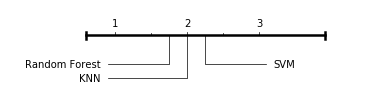

In [ ]:
import Orange 
import matplotlib.pyplot as plt
# Assigning the list of model names
names = ["SVM", "KNN", "Random Forest"]
avranks = [2.25,2.00,1.75]
cd = Orange.evaluation.compute_CD(avranks,n=4,alpha="0.05")
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)
plt.show();